# Introduction

This notebook was basically inspired by:

- [In Depth: Parameter tuning for SVC](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)
- [SVM Hyperparameter Tuning using GridSearchCV](https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/):

The goal of this notebook is to show the basic steps in machine learning and the influence of choosing the "right" the kernel of a **support vector classifier (SVC)**. Furthermore, the SVC parameters are described and their effect on the classification result is shown.

Following steps will be shown in next **chapters**:

- [STEP 0: Get the data](#STEP-0:-Get-the-data)
- [STEP 1: Exploring the data](#STEP-1:-Exploring-the-data)
- [STEP 2: Prepare the data](#STEP-2:-Prepare-the-data)
- [STEP 3: Classify by support vector classifier - SVC](#STEP-3:-Classify-by-support-vector-classifier---SVC)
- [STEP 4: Evaluate the results - metrics](#STEP-4:-Evaluate-the-results---metrics)
- [STEP 5: Vary parameters](#STEP-5:-Vary-parameters)

# Load globally used libraries and set plot parameters

In [40]:
import time

from IPython.display import HTML

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, metrics
import seaborn as sns
%matplotlib inline

# STEP 0: Get the data

Since this is intended to be an introduction to the world of machine learning (ML), this step does NOT deal with the design of an application suitable for ML and the acquisition of valid measurement data.

In order to get to know the typical work steps and ML tools, the use of **well-known and well-researched data sets** is clearly **recommended**.

In the further course, the famous [Iris flower data sets](https://en.wikipedia.org/wiki/Iris_flower_data_set) will be used.
It can be downloaded on [Iris Flower Dataset | Kaggle](https://www.kaggle.com/datasets/arshid/iris-flower-dataset). Furthermore, the dataset is included in Python in the machine learning package [Scikit-learn](https://scikit-learn.org), so that users can access it without having to find a special source for it.

In [1]:
# import some data to play with
irisdata_df = pd.read_csv('./datasets/IRIS_flower_dataset_kaggle.csv')

# STEP 1: Exploring the data

## Goals of exploration

The objectives of the exploration of the dataset are as follows:

1. Clarify the **origins history**:
    - Where did the data come from? => Contact persons and licensing permissions?
    - Who obtained the data and with which (measurement) methods? => Did systematic errors occur during the acquisition?
    - What were they originally intended for? => Can they be used for my application?

2. Overview of the internal **structure and organisation** of the data:
    - Which columns are there? => With which methods can they be read in (e.g. import of CSV files)?
    - What do they contain for (physical) measured variables? => Which technical or physical correlations exist?
    - Which data formats or types are there? => Do they have to be converted?
    - In which value ranges do the measurement data vary? => Are normalizations necessary?

3. Identify **anomalies** in the data sets:
    - Do the data have **gaps** or **duplicates**? => Does the data set needs to be cleaned?
    - Are there obvious erroneous entries or measurement outliers? => Does (statistical) filtering have to be carried out?

4. Avoidance of **tendencies due to bias**:
    - Are all possible classes included in the dataset and equally distributed? => Does the data set need to be enriched with additional data for balance?

5. Find a first rough **idea of which correlations** could be in the data set

## Clarify the **origins history**

> The ***Iris* flower data sets** is a multivariate data set introduced by the British statistician and biologist *Ronald Fisher* in his paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis" (1936). It is sometimes called *Anderson's Iris data set* because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species (source: [Iris flower data set](https://en.wikipedia.org/w/index.php?title=Iris_flower_data_set&oldid=1090001619)).

The dataset is published in Public Domain with a [CC0-License](https://creativecommons.org/share-your-work/public-domain/cc0/).

This dataset became a typical test case for many statistical classification techniques in machine learning such as **support vector machines**.

> [..] measurements of the flowers of fifty plants each of the two species *Iris setosa* and *I. versicolor*, found **growing together in the same colony** and measured by Dr E. Anderson [..] (source: R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". [Annals of Eugenics](https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x))

> [..] *Iris virginica*, differs from the two other samples in **not being taken from the same natural colony** [..] (source: ibidem)

## Overview of the internal **structure and organisation** of the data

The data set consists of 50 samples from each of three species of Iris ([*Iris setosa*](https://en.wikipedia.org/wiki/Iris_setosa), [*Iris virginica*](https://en.wikipedia.org/wiki/Iris_virginica) and [*Iris versicolor*](https://en.wikipedia.org/wiki/Iris_versicolor)), so there are 150 total samples. Four features were measured from each sample: the length and the width of the [sepals](https://en.wikipedia.org/wiki/Sepal) and [petals](https://en.wikipedia.org/wiki/Petal), in centimetres.  
Here is a principle illustration of a flower with sepal and petal:

In [21]:
display(HTML("<figure><img src='./images/Mature_flower_diagram.svg' width='800px'> \
                 <figcaption>Principle illustration of a flower with sepal and petal (source: <a href='https://en.wikipedia.org/wiki/File:Mature_flower_diagram.svg'>Mature_flower_diagram.svg</a>)</figcaption> \
              </figure>"))

Here are pictures of the three different Iris species (*Iris setosa*, *Iris virginica* and *Iris versicolor*). Given the dimensions of the flower, it will be possible to predict the class of the flower.

In [22]:
display(HTML("<table> \
                <tr> \
                <td><figure><img src='./images/Iris_setosa_640px.jpg' width='320px'> \
                        <figcaption><i>Iris setosa</i> (source: <a href='https://commons.wikimedia.org/wiki/File:Irissetosa1.jpg'>Irissetosa1.jpg</a>)</figcaption> \
                    </figure></td> \
                <td><figure><img src='./images/Iris_versicolor_640px.jpg' width='320px'> \
                        <figcaption><i>Iris versicolor</i> (source: <a href='https://en.wikipedia.org/wiki/File:Iris_versicolor_3.jpg'>Iris versicolor 3.jpg</a>)</figcaption> \
                    </figure></td> \
                <td><figure><img src='./images/Iris_virginica_590px.jpg' width='295px'> \
                        <figcaption><i>Iris virginica</i> (source: <a href='https://en.wikipedia.org/wiki/File:Iris_virginica.jpg'>Iris virginica.jpg</a>)</figcaption> \
                    </figure></td> \
                </tr> \
              </table>"))

Iris setosa (source: Irissetosa1.jpg),Iris versicolor (source: Iris versicolor 3.jpg),Iris virginica (source: Iris virginica.jpg)


### Inspect **structure of dataframe**

Print first or last 5 rows of dataframe:

In [3]:
irisdata_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
irisdata_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


While printing a dataframe - only an abbreviated view of the dataframe is shown :(  
Default setting in the pandas library makes it to display only 5 lines from head and from tail.

In [6]:
irisdata_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


To print all rows of a dataframe, the option `display.max_rows` has to set to `None` in pandas:

In [7]:
pd.set_option('display.max_rows', None)
irisdata_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Get data types

In [8]:
irisdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [9]:
irisdata_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Get data ranges with Boxplots

**Boxplots** can be used to explore the data ranges in the data set. These also provide information about **outliers**.

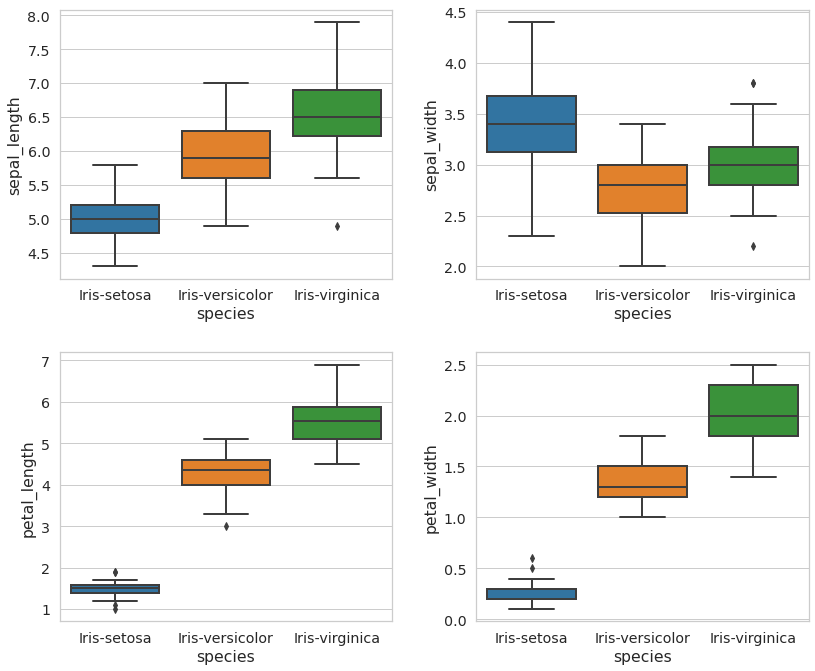

In [36]:
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.0})
sns.set_style("whitegrid")
#sns.set_style("white")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

fn = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
cn = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
box1 = sns.boxplot(x = 'species', y = 'sepal_length', data = irisdata_df, order = cn, ax = axs[0,0])
box2 = sns.boxplot(x = 'species', y = 'sepal_width', data = irisdata_df, order = cn, ax = axs[0,1])
box3 = sns.boxplot(x = 'species', y = 'petal_length', data = irisdata_df, order = cn, ax = axs[1,0])
box4 = sns.boxplot(x = 'species', y = 'petal_width', data = irisdata_df,  order = cn, ax = axs[1,1])

# add some spacing between subplots
fig.tight_layout(pad=2.0)

plt.show()

## Identify **anomalies** in the data sets

### Find gaps in dataset

This section was inspired by [Working with Missing Data in Pandas](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/).

#### Checking for missing values using `isnull()`

In order to check for missing values in Pandas DataFrame, we use the function `isnull()`. This function returns a dataframe of Boolean values which are True for **NaN values**.

In [37]:
pd.set_option('display.max_rows', 40)
pd.set_option('display.min_rows', 30)

In [38]:
irisdata_df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


Show only the gaps:

In [5]:
irisdata_df_gaps = irisdata_df[irisdata_df.isnull().any(axis=1)]
irisdata_df_gaps

,sepal_length,sepal_width,petal_length,petal_width,species


Fine - this dataset seems to be complete :)

So let's look for something else for exercise: [employes.csv](https://media.geeksforgeeks.org/wp-content/uploads/employees.csv)

In [39]:
# import data to dataframe from csv file
employees_df = pd.read_csv("./datasets/employees_edit.csv")

employees_df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6945.00,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.17,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11858.00,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.34,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1389.00,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10125.00,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10012.00,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11598.00,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18523.00,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7524.00,True,Business Development


Show only the gaps from this gappy dataset again:

In [40]:
employees_df_gaps = employees_df[employees_df.isnull().any(axis=1)]
employees_df_gaps

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.17,True,NaN
7,NaN,Female,7/20/2015,10:43 AM,45906,11598.00,NaN,Finance
10,Louise,Female,8/12/1980,9:01 AM,63241,15132.00,True,NaN
20,Lois,NaN,4/22/1995,7:18 PM,64714,4934.00,True,Legal
22,Joshua,NaN,3/8/2012,1:58 AM,90816,18816.00,True,Client Services
23,NaN,Male,6/14/2012,4:19 PM,125792,5042.00,NaN,NaN
25,NaN,Male,10/8/2012,1:12 AM,37076,18576.00,NaN,Client Services
27,Scott,NaN,7/11/1991,6:58 PM,122367,5218.00,False,Legal
31,Joyce,NaN,2/20/2005,2:40 PM,88657,12752.00,False,Product
32,NaN,Male,8/21/1998,2:27 PM,122340,6417.00,NaN,NaN


#### Fill the missing values with `fillna()`

Now we are going to fill all the null (NaN) values in Gender column with *"No Gender"*.

**Attention:** We are doing that directly in this dataframe with `inplace = True` - we don't make a deep copy!

In [41]:
# filling a null values using fillna()
employees_df["Gender"].fillna("No Gender", inplace = True)
employees_df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6945.00,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.17,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11858.00,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.34,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1389.00,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10125.00,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10012.00,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11598.00,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18523.00,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7524.00,True,Business Development


#### Dropping missing values using `dropna()`

In order to drop null values from a dataframe, we use `dropna()` function. This function drops rows or columns of datasets with NaN values in different ways.

Default is to drop rows with at least 1 null value (NaN).
Giving the parameter `how = 'all'` the function drops rows with all data missing or contain null values (NaN).

In [42]:
# making a new dataframe with dropped NaN values
employees_df_dropped = employees_df.dropna(axis = 0, how ='any')
employees_df_dropped

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6945.00,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11858.00,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.34,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1389.00,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10125.00,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10012.00,True,Product
8,Angela,Female,11/22/2005,6:29 AM,95570,18523.00,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7524.00,True,Business Development
11,Julie,Female,10/26/1997,3:19 PM,102508,12637.00,True,Legal
12,Brandon,Male,12/1/1980,1:08 AM,112807,17492.00,True,Human Resources


Finally we compare the sizes of dataframes so that we learn how many rows had at least 1 Null value.

In [43]:
print("Old data frame length:", len(employees_df))
print("New data frame length:", len(employees_df_dropped))
print("Number of rows with at least 1 NaN value: ", (len(employees_df)-len(employees_df_dropped)))

Old data frame length: 1004
New data frame length: 903
Number of rows with at least 1 NaN value:  101


### Find and remove duplicates in dataset

This section was inspired by:
- [How to Find Duplicates in Pandas DataFrame (With Examples)](https://www.statology.org/pandas-find-duplicates/)
- [How to Drop Duplicate Rows in a Pandas DataFrame](https://www.statology.org/pandas-drop-duplicates/)

#### Checking for duplicate values using `duplicated()`

In order to check for duplicate values in Pandas DataFrame, we use a function `duplicated()`. This function can be used in two ways:
- find duplicate rows across **all columns** with `duplicateRows = df[df.duplicated()]`
- find duplicate rows across **specific columns** `duplicateRows = df[df.duplicated(subset=['col1', 'col2'])]`

Find duplicate rows across **all columns**:

In [44]:
# import (again) data to dataframe from csv file
employees_df = pd.read_csv("./datasets/employees_edit.csv")

In [45]:
# find duplicate rows across all columns
duplicateRows = employees_df[employees_df.duplicated()]
duplicateRows

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
112,Karen,Female,11/30/1999,7:46 AM,102488,17653.0,True,Product
127,Linda,Female,5/25/2000,5:45 PM,119009,12506.0,True,Business Development
296,Brandon,NaN,11/3/1997,8:17 PM,121333,15295.0,False,Business Development
580,Nicholas,Male,3/1/2013,9:26 PM,101036,2826.0,True,Human Resources


In [46]:
# argument keep=’last’ displays the first duplicate rows instead of the last
duplicateRows = employees_df[employees_df.duplicated(keep='last')]
duplicateRows

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
55,Karen,Female,11/30/1999,7:46 AM,102488,17653.0,True,Product
92,Linda,Female,5/25/2000,5:45 PM,119009,12506.0,True,Business Development
153,Brandon,NaN,11/3/1997,8:17 PM,121333,15295.0,False,Business Development
442,Nicholas,Male,3/1/2013,9:26 PM,101036,2826.0,True,Human Resources


Find duplicate rows across **specific columns**:

In [47]:
# identify duplicate rows across 'First Name' and 'Last Login Time' columns
duplicateRows = employees_df[employees_df.duplicated(subset=['First Name', 'Last Login Time'])]
duplicateRows

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
112,Karen,Female,11/30/1999,7:46 AM,102488,17653.0,True,Product
127,Linda,Female,5/25/2000,5:45 PM,119009,12506.0,True,Business Development
296,Brandon,NaN,11/3/1997,8:17 PM,121333,15295.0,False,Business Development
577,NaN,Female,1/13/2009,1:01 PM,118736,7421.0,NaN,Client Services
580,Nicholas,Male,3/1/2013,9:26 PM,101036,2826.0,True,Human Resources
632,NaN,NaN,9/2/1988,12:49 PM,147309,1702.0,NaN,Distribution
881,NaN,Male,9/5/1980,7:36 AM,114896,13823.0,NaN,Client Services
929,NaN,Female,8/23/2000,4:19 PM,95866,19388.0,NaN,Sales
934,Nancy,Female,9/10/2001,11:57 PM,85213,2386.0,True,Marketing
973,Linda,Female,2/4/2010,8:49 PM,44486,17308.0,True,Engineering


In [48]:
# argument keep=’last’ displays the first duplicate rows instead of the last
duplicateRows = employees_df[employees_df.duplicated(subset=['First Name', 'Last Login Time'], keep='last')]
duplicateRows

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
23,NaN,Male,6/14/2012,4:19 PM,125792,5042.00,NaN,NaN
37,Linda,Female,10/19/1981,8:49 PM,57427,9557.00,True,Client Services
55,Karen,Female,11/30/1999,7:46 AM,102488,17653.00,True,Product
66,Nancy,Female,12/15/2012,11:57 PM,125250,2672.00,True,Business Development
92,Linda,Female,5/25/2000,5:45 PM,119009,12506.00,True,Business Development
153,Brandon,NaN,11/3/1997,8:17 PM,121333,15295.00,False,Business Development
222,NaN,Female,6/17/1991,12:49 PM,71945,5.56,NaN,Marketing
269,NaN,Male,2/4/2005,1:01 PM,40451,16044.00,NaN,Distribution
442,Nicholas,Male,3/1/2013,9:26 PM,101036,2826.00,True,Human Resources
778,NaN,Female,6/18/2000,7:36 AM,106428,10867.00,NaN,NaN


#### Dropping duplicate values using `drop_duplicates()`

In order to drop duplicate values from a dataframe, we use `drop_duplicates()` function.

This function can be used in two ways:
- remove duplicate rows across **all columns** with `df.drop_duplicates()`
- find duplicate rows across **specific columns** `df.drop_duplicates(subset=['col1', 'col2'])`

**Attention:** We are doing that directly in this dataframe with `inplace = True` - we don't make a deep copy!

Remove duplicate rows across **all columns**:

In [49]:
# remove duplicate rows across all columns
employees_df.drop_duplicates(inplace=True)
employees_df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6945.00,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.17,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11858.00,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.34,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1389.00,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10125.00,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10012.00,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11598.00,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18523.00,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7524.00,True,Business Development


Remove duplicate rows across **specific columns**:

In [50]:
# remove duplicate rows across 'First Name' and 'Last Login Time' columns
employees_df.drop_duplicates(subset=['First Name', 'Last Login Time'], keep='last', inplace=True)
employees_df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6945.00,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.17,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11858.00,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.34,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1389.00,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10125.00,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10012.00,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11598.00,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18523.00,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7524.00,True,Business Development


## Avoidance of **tendencies due to bias**

The description of the Iris dataset says, that it consists of **50 samples** from **each of three species** of Iris (Iris setosa, Iris virginica and Iris versicolor), so there are **150 total samples**.

But how to prove it?

### Count occurrences of unique values

To prove whether all possible classes included in the dataset and equally distributed, you can use the function `df.value_counts`.

Following parameters can be used for fine tuning:
- `dropna=False` causes that NaN values are included
- `normalize=True`: relative frequencies of the unique values are returned
- `ascending=False`: sort resulting classes descending

In [51]:
# import (again) data to dataframe from csv file
employees_df = pd.read_csv("./datasets/employees_edit.csv")

In [6]:
# count unique values without missing values in a column, ordered descending and normalized
irisdata_df['species'].value_counts(ascending=False, dropna=False, normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: species, dtype: float64

In [59]:
# count unique values and missing values in a column, ordered descending and not absolute values
employees_df['Team'].value_counts(ascending=False, dropna=False, normalize=False)

Client Services         106
Business Development    103
Finance                 102
Marketing                98
Product                  96
Sales                    94
Engineering              92
Human Resources          92
Distribution             90
Legal                    88
NaN                      43
Name: Team, dtype: int64

### Display Histogram

This section was inspired by: [Pandas Histogram – DataFrame.hist()](https://dataindependent.com/pandas/pandas-histogram-dataframe-hist/).

**Histograms** represent **frequency distributions** graphically. This requires the separation of the data into classes (so-called **bins**).

These classes are represented in the histogram as rectangles of equal or variable width. The height of each rectangle then represents the (relative or absolute) **frequency density**.

array([[<AxesSubplot:title={'center':'Salary'}>]], dtype=object)

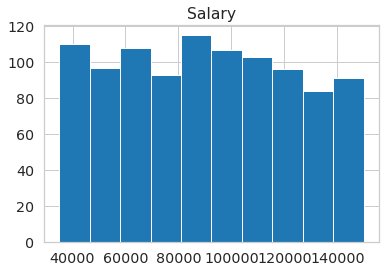

In [37]:
employees_df.hist(column=['Salary'])

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

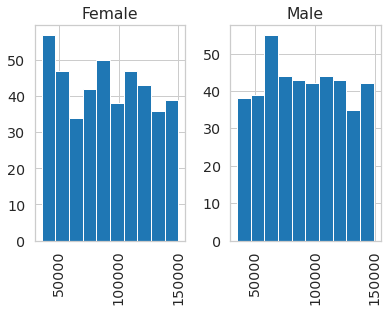

In [38]:
employees_df.hist(column='Salary', by='Gender')

## First **idea of correlations** in data set

To get a rough idea of the **dependencies** and **correlations** in the data set, it can be helpful to visualize the whole dataset in a **correlation heatmap**. They show in a glance which variables are correlated, to what degree and in which direction.

Later, 2 particularly well correlated variables are selected from the data set and plotted in a **scatterplot**.

### Visualise data with **correlation heatmap**

This section was inspired by [How to Create a Seaborn Correlation Heatmap in Python?](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e).


> **Correlation matrices** are an **essential tool of exploratory data analysis**. Correlation heatmaps contain the same information in a visually appealing way. What more: they show in a glance which variables are correlated, to what degree, in which direction, and alerts us to potential multicollinearity problems (source: ibidem).

#### Simple correlation matrix

Because **string values can never be correlated**, the class names (species) have to be converted first:

In [91]:
# encoding the class column
irisdata_df_enc = irisdata_df.replace({"species":  {"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}})
irisdata_df_enc

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [92]:
irisdata_df_enc.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


#### Correlation heatmap

Choose the color sets from [color map](https://pod.hatenablog.com/entry/2018/09/20/212527).

Text(0.5, 1.0, 'Correlation Heatmap')

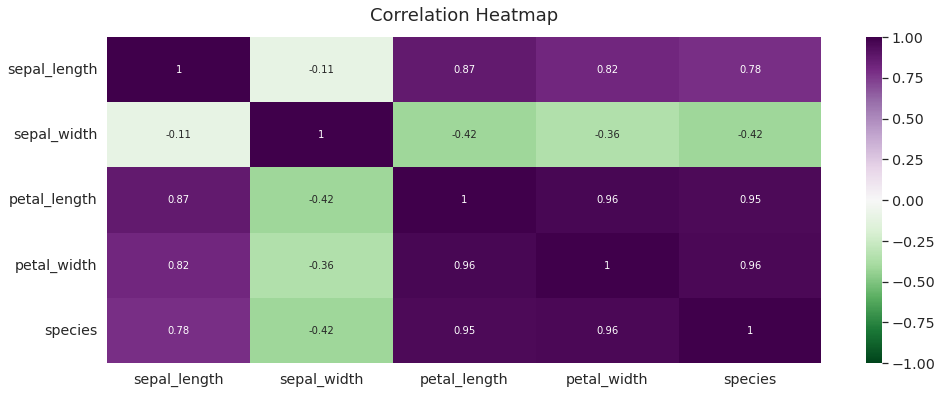

In [93]:
# increase the size of the heatmap
plt.figure(figsize=(16, 6))

# store heatmap object in a variable to easily access it 
# when you want to include more features (such as title)
# set the range of values to be displayed on the colormap from -1 to 1,
# and set 'annotation=True' to display the correlation values on the heatmap
heatmap = sns.heatmap(irisdata_df_enc.corr(), vmin=-1, vmax=1, annot=True, cmap='PRGn_r')

# give a title to the heatmap
# 'pad=12' defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

#### Triangle correlation heatmap

When looking at the correlation heatmaps above, you would not lose any information by **cutting** away half of it **along the diagonal** line marked by 1-s.

The **numpy** function `np.triu()` can be used to isolate the upper triangle of a matrix while turning all the values in the lower triangle into 0.

In [94]:
import numpy as np

np.triu(np.ones_like(irisdata_df_enc.corr()))

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

Use this mask to cut the heatmap along the diagonal:

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

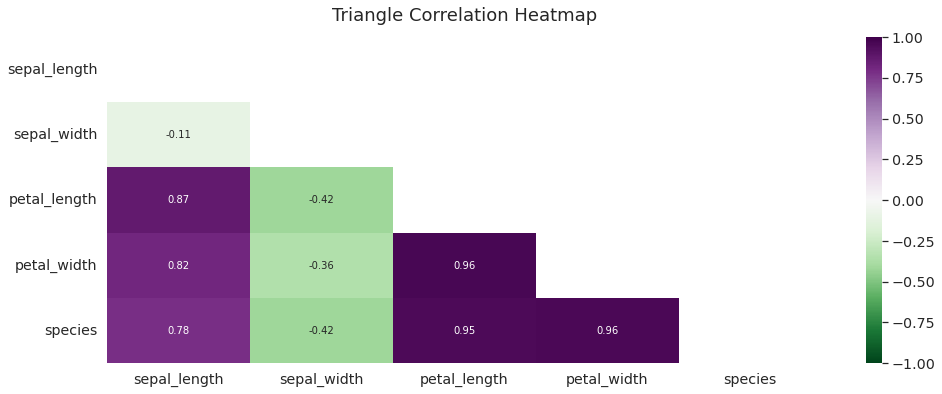

In [95]:
plt.figure(figsize=(16, 6))

# define the mask to set the values in the upper triangle to 'True'
mask = np.triu(np.ones_like(irisdata_df_enc.corr(), dtype=bool))

heatmap = sns.heatmap(irisdata_df_enc.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PRGn_r')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

As a result from the **heatmaps** we can see, that the shape of the **petals** are the **most correlationed columns** (0.96) with the **type of flowers** (species classes).

Somewhat lower correlates **sepal length** with **petal length** (0.87).

### Visualise data with **scatter plot**

In the following, [Seaborn](https://seaborn.pydata.org/) is applied which is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures. 

To investigate whether there are dependencies (e.g. correlations) in `irisdata_df` between individual variables in the data set, it is advisable to plot them in a **scatter plot**.

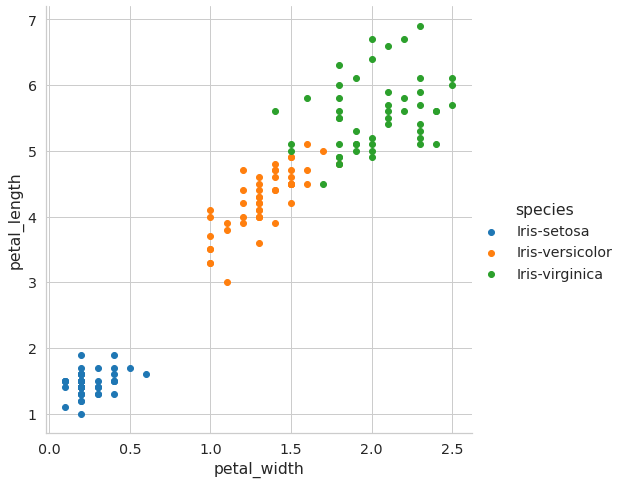

In [16]:
# There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks.
sns.set_style("whitegrid")
# set scale of fonts
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

# 'sepal_length', 'petal_length' are iris feature data
# 'height' used to define height of graph
# 'hue' stores the class/label of iris dataset
sns.FacetGrid(irisdata_df, hue ="species",
              height = 7).map(plt.scatter,
                              'petal_width',
                              'petal_length').add_legend()

### Visualise data with **pairs plot**

For systematic investigation of dependencies, all variables (each against each) are plotted in separate scatter plots.

With this so called **[pairs plot](https://vita.had.co.nz/papers/gpp.pdf)** it is possible to see both **relationships** between two variables and **distribution** of single variables.

This function will create a grid of Axes such that **each numeric variable** in `irisdata_df` will by shared in the y-axis across a single row and in the x-axis across a single column.

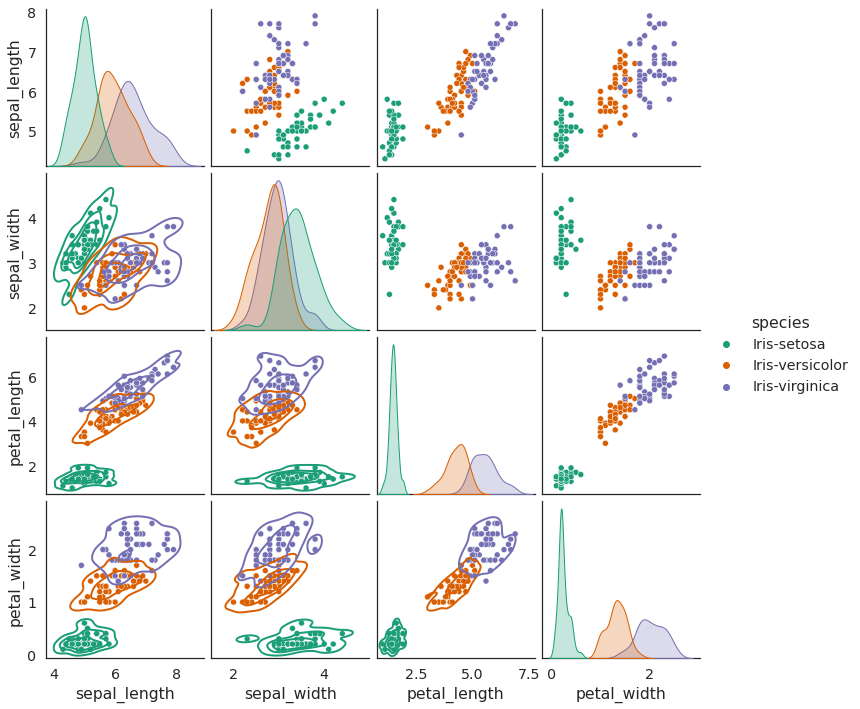

In [60]:
sns.set_style("white")
g = sns.pairplot(irisdata_df, diag_kind="kde", hue='species', palette='Dark2', height=2.5)

g.map_lower(sns.kdeplot, levels=4, color=".2")

# STEP 2: Prepare the data

Through the intensive exploration of the data in Step 1 ([STEP 1: Exploring the data](#STEP-1:-Exploring-the-data)), we know that special **preparation** of the data is **not necessary**. The values are **complete** and **without gaps** and there are **no duplicates**. The values are in similar ranges, which **does not require** **normalization** of the data.

Furthermore, we know that the **classes** are very **evenly distributed** and thus bias tendencies should be avoided.

# STEP 3: Classify by support vector classifier - SVC

## Operating principal

> Support Vectors Classifier tries to **find the best hyperplane to separate** the different classes by maximizing the distance between sample points and the hyperplane (source: [In Depth: Parameter tuning for SVC](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)).

Following graphic shows the operating principal of SVC: the hyperplane *H1* does not separate the classes. *H2* does, but only with a small margin. *H3* separates them with the maximal margin (source: [Support-vector machine](https://en.wikipedia.org/wiki/Support-vector_machine)).

In [7]:
display(HTML("<figure><img src='./images/SVM_separating_hyperplanes.svg' width='400px'> \
                 <figcaption>SVC seperate the data in classes by finding the best hyperplane (source: <a href='https://en.wikipedia.org/wiki/File:Svm_separating_hyperplanes_(SVG).svg'>Svm separating hyperplanes (SVG).svg</a>)</figcaption> \
              </figure>"))

## Split the dataset

In the next very important step, the dataset is split into **2 subsets**: a **training dataset** and a **test dataset**. As the names suggest, the training dataset is used to train the ML algorithm. The test data set is then used to check the quality of the trained ML algorithm (here the **recognition rate**). For this purpose, the **class labels** are **removed** from the training data set - after all, these are to be predicted.

Typically, the **test dataset** set should contain **20%** of the entire dataset.

In [43]:
from sklearn.model_selection import train_test_split

X = irisdata_df.drop('species', axis=1)
y = irisdata_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

For training, do not use only the variables that correlate best with each other, but all of them. 

Otherwise, the result of the prediction would be significantly worse. Maybe this is already an indication of **overfitting** of the ML model.

In [42]:
# do not use this!
X_train, X_test, y_train, y_test = train_test_split(X[['sepal_length', 'sepal_width']], y, test_size = 0.20)

## Create the SVM model

In this step we create the SVC model and fit it to our training data.

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

# fit the model for the data
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Make predictions

In [45]:
y_pred = classifier.predict(X_test)
#X_test

# STEP 4: Evaluate the results - metrics

And finally for checking the accuracy of the model, the **confusion matrix** is used for the **cross validation**.

By using the function `sklearn.metrics.confusion_matrix()` a confusion matrix of the true digit values versus the predicted digit values is plotted.

## Textual confusion matrix

In [46]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 8  0  0]
 [ 0  7  0]
 [ 0  0 15]]


## Colored confusion matrix

The function `sklearn.metrics.ConfusionMatrixDisplay()` plots a colored confusion matrix.

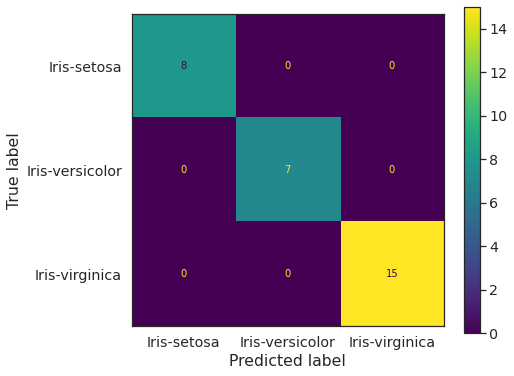

In [58]:
sns.set_style("white")

# print colored confusion matrix
cm_colored = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

#cm_colored.figure_.suptitle("Confusion Matrix")
cm_colored.figure_.set_figwidth(7)
cm_colored.figure_.set_figheight(6)

cm_colored.confusion_matrix
plt.show()

In [156]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.67 %
Standard Deviation: 5.53 %


# STEP 5: Vary parameters

This section was inspired by [In Depth: Parameter tuning for SVC](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)

In this section, the 4 SVC parameters `kernel`, `gamma`, `C` and `degree` will be introduced one by one. Furthermore, their influence on the classification result by varying these single parameters will be shown.

**Disclaimer:** In order to show the effects of varying the individual parameters in 2D graphs, only the best correlating variables `petal_length` and `petal_width` are used to train the SVC.

## Prepare dataset

In [98]:
# import iris dataset again
irisdata_df = pd.read_csv('./datasets/IRIS_flower_dataset_kaggle.csv')

# encode the class column from class strings to integer equivalents
irisdata_df_enc = irisdata_df.replace({"species":  {"Iris-setosa":0,"Iris-versicolor":1, "Iris-virginica":2}})
irisdata_df_enc

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [116]:
# copy only 2 feature columns
# and convert pandas dataframe to numpy array
X = irisdata_df_enc[['petal_length', 'petal_width']].to_numpy(copy=True)
#X = irisdata_df_enc[['sepal_length', 'sepal_width']].to_numpy(copy=True)
#X

In [118]:
# convert pandas dataframe to numpy array
# and get a flat 1D copy of 2D numpy array
y = irisdata_df_enc[['species']].to_numpy(copy=True).flatten()
#y

## Plotting function

This function helps to visualize the modifications by varying the individual SVC parameters.

In [101]:
def plotSVC(title, xlabel, ylabel):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # prevent division by zero
    if x_min == 0.0:
        x_min = 0.1
    
    h = (x_max / x_min)/1000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

## Vary `kernel` parameter

The `kernel` parameter selects the type of hyperplane that is used to separate the data. Using `linear` ([linear classifier](https://en.wikipedia.org/wiki/Linear_classifier)) kernel will use a linear hyperplane (a line in the case of 2D data). The `rbf` ([radial basis function kernel](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)) and `poly` ([polynomial kernel](https://en.wikipedia.org/wiki/Polynomial_kernel)) kernel use non linear hyperplanes.

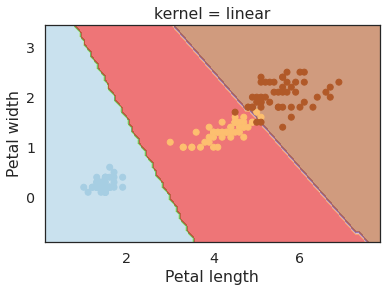

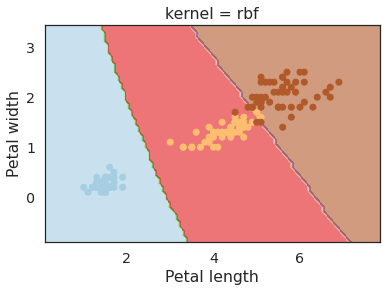

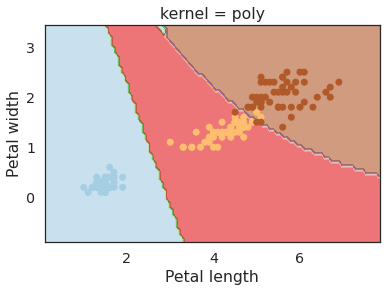

In [102]:
kernels = ['linear', 'rbf', 'poly']

xlabel = 'Petal length'
ylabel = 'Petal width'

for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel = ' + str(kernel), xlabel, ylabel)

## Vary `gamma` parameter

The `gamma` parameter is used for non linear hyperplanes. The higher the `gamma` value it tries to exactly fit the training data set.

As we can see, increasing `gamma` leads to **overfitting** as the classifier tries to perfectly fit the training data.

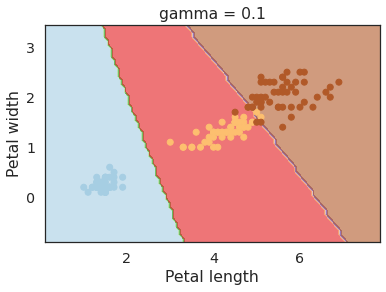

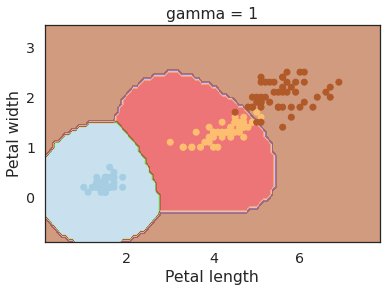

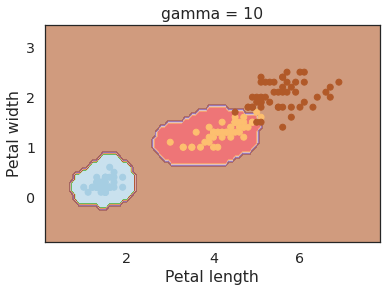

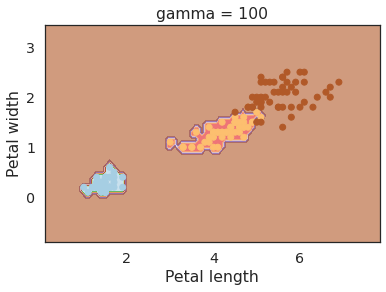

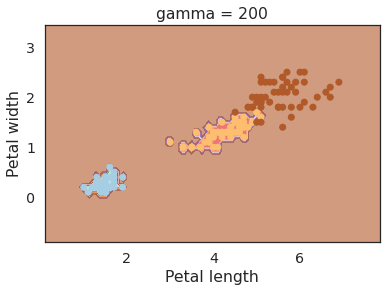

In [106]:
gammas = [0.1, 1, 10, 100, 200]

xlabel = 'Petal length'
ylabel = 'Petal width'

for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC('gamma = ' + str(gamma), xlabel, ylabel)

## Vary `C` parameter

The `C` parameter is the **penalty** of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

But be careful: to high `C` values may lead to **overfitting** the training data.

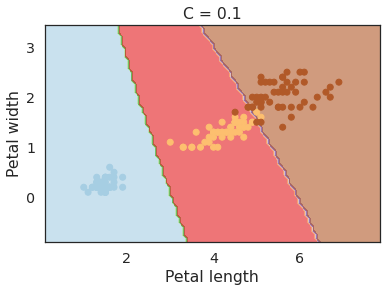

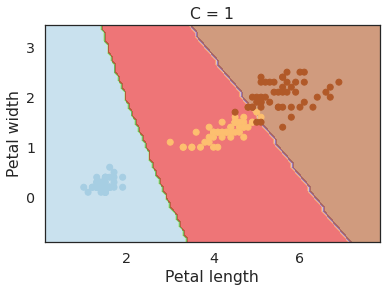

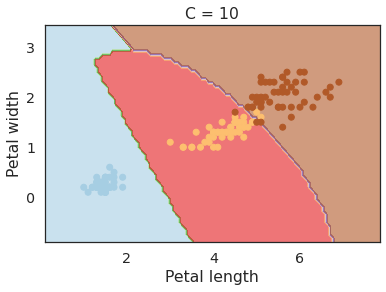

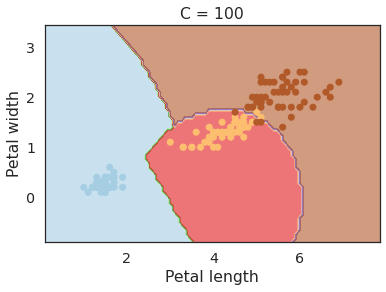

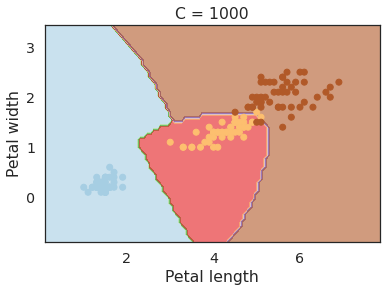

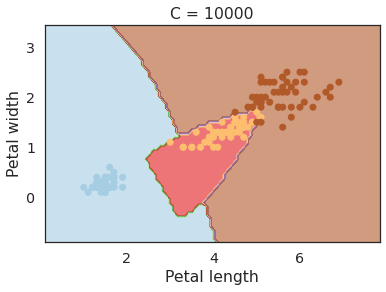

In [108]:
cs = [0.1, 1, 10, 100, 1000, 10000]

xlabel = 'Petal length'
ylabel = 'Petal width'

for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
    plotSVC('C = ' + str(c), xlabel, ylabel)

## Vary `degree` parameter

The `degree` parameter is used when the `kernel` is set to `poly`. It’s basically the **degree of the polynomial** used to find the hyperplane to split the data.

Using `degree = 1` is the same as using a `linear` kernel. Also, increasing this parameters leads to **higher training times**.

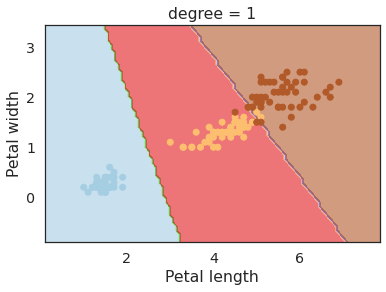

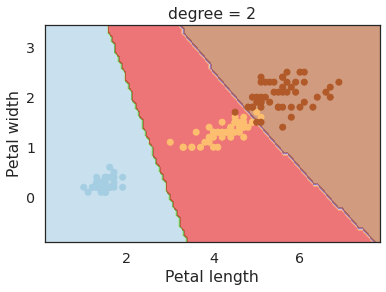

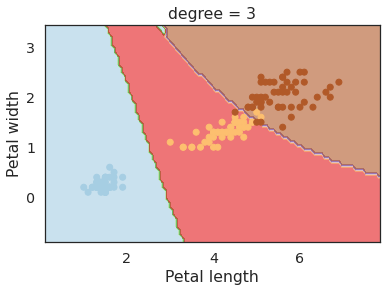

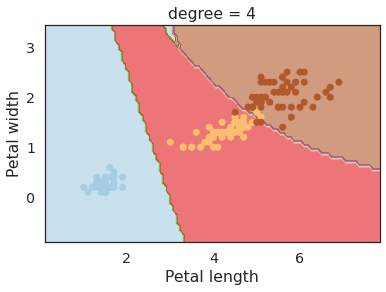

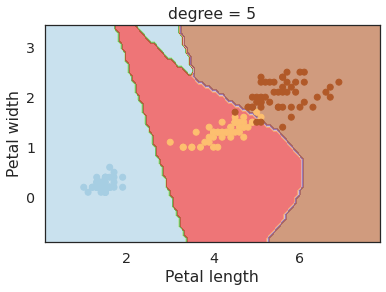

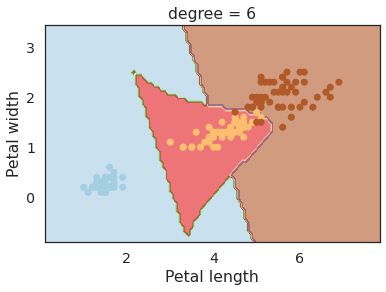

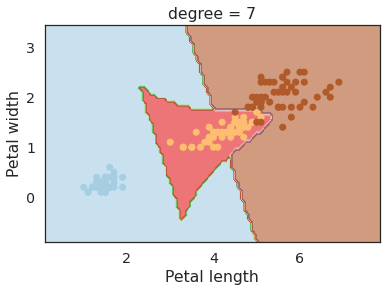

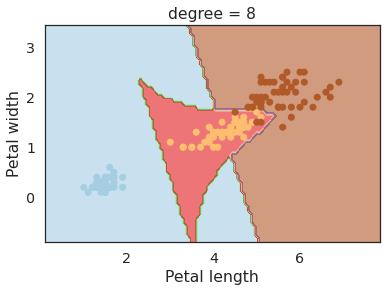

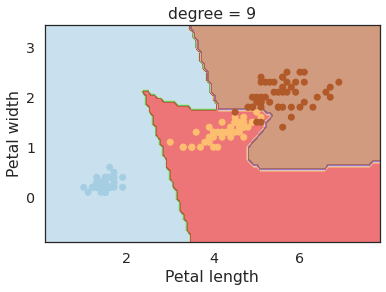

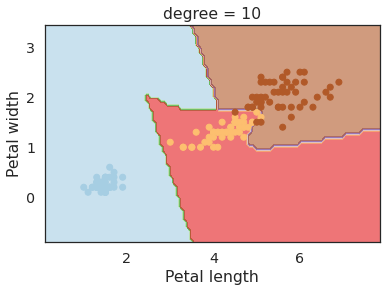

In [113]:
degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

xlabel = 'Petal length'
ylabel = 'Petal width'

for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X, y)
    plotSVC('degree = ' + str(degree), xlabel, ylabel)